In [ ]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
from sklearn.preprocessing import LabelEncoder

In [ ]:
nltk.download("stopwords")
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df = pd.read_csv('/content/sample_data/train.csv')
print("Shape of data=>",df.shape)

Shape of data=> (19579, 3)


In [ ]:
lemmatiser = WordNetLemmatizer()
# Defining a module for Text Processing
def text_process(tex):
    # 1. Removal of Punctuation Marks 
    nopunct=[char for char in tex if char not in string.punctuation]
    nopunct=''.join(nopunct)
    # 2. Lemmatisation 
    a=''
    i=0
    for i in range(len(nopunct.split())):
        b=lemmatiser.lemmatize(nopunct.split()[i], pos="v")
        a=a+b+' '
    # 3. Removal of Stopwords
    return [word for word in a.split() if word.lower() not 
            in stopwords.words('english')]

In [ ]:
y = df['author']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.
EAP


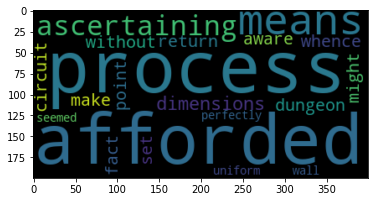

It never once occurred to me that the fumbling might be a mere mistake.
HPL


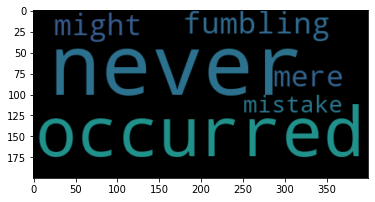

How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread beneath, speckled by happy cottages and wealthier towns, all looked as in former years, heart cheering and fair.
MWS


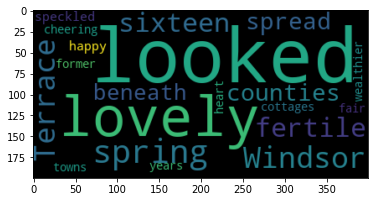

In [ ]:
X = df['text']
wordcloud1 = WordCloud().generate(X[0]) # for EAP
wordcloud2 = WordCloud().generate(X[1]) # for HPL
wordcloud3 = WordCloud().generate(X[3]) # for MWS 
print(X[0])
print(df['author'][0])
plt.imshow(wordcloud1, interpolation='bilinear')
plt.show()
print(X[1])
print(df['author'][1])
plt.imshow(wordcloud2, interpolation='bilinear')
plt.show()
print(X[3])
print(df['author'][3])
plt.imshow(wordcloud3, interpolation='bilinear')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y
                                  ,test_size=0.2, random_state=1234)
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_train)
text_bow_train=bow_transformer.transform(X_train)
text_bow_test=bow_transformer.transform(X_test)

In [ ]:
#Benchmark for Log_loss
from sklearn.metrics import log_loss
log_loss([0,1],[0.5,0.5])

0.6931471805599453

In [ ]:
model = MultinomialNB()
model = model.fit(text_bow_train, y_train)
print(model.score(text_bow_train, y_train))
print(model.score(text_bow_test, y_test))
predictions = model.predict(text_bow_test)
print(classification_report(y_test,predictions))

0.9074889867841409
0.8414198161389173
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1562
           1       0.87      0.83      0.85      1149
           2       0.81      0.87      0.84      1205

    accuracy                           0.84      3916
   macro avg       0.84      0.84      0.84      3916
weighted avg       0.84      0.84      0.84      3916



In [ ]:
predictions = model.predict_proba(text_bow_test)
log_loss(y_test,predictions)


0.4255388297511528

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(text_bow_train, y_train)
print(clf.score(text_bow_train, y_train))
print(clf.score(text_bow_test, y_test))
predictions = clf.predict(text_bow_test)
print(classification_report(y_test,predictions))

0.9742067292345017
0.8066905005107252
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1562
           1       0.85      0.76      0.80      1149
           2       0.81      0.80      0.81      1205

    accuracy                           0.81      3916
   macro avg       0.81      0.80      0.81      3916
weighted avg       0.81      0.81      0.81      3916



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
predictions = clf.predict_proba(text_bow_test)
log_loss(y_test,predictions)

0.46454009142843766

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
clf_cv = LogisticRegressionCV(cv=9,max_iter=10000).fit(text_bow_train, y_train)
print(clf_cv.score(text_bow_train, y_train))
print(clf_cv.score(text_bow_test, y_test))
predictions = clf_cv.predict(text_bow_test)
print(classification_report(y_test,predictions))

0.9441358615846261
0.8115423901940756
              precision    recall  f1-score   support

           0       0.77      0.86      0.82      1562
           1       0.86      0.76      0.80      1149
           2       0.83      0.80      0.81      1205

    accuracy                           0.81      3916
   macro avg       0.82      0.81      0.81      3916
weighted avg       0.81      0.81      0.81      3916



In [ ]:
predictions = clf_cv.predict_proba(text_bow_test)
log_loss(y_test,predictions)

0.4783834976516719